# 04: Creating Training Dataframe for Model + Probability Aggregates for Sim
This notebook prepares datasets that will be used for our R predictive model and simulation

includes probability tables for sex and disposition, and the training data that the admitted LOS will use

In [2]:
import pandas as pd
from IPython.display import display, HTML
import numpy as np

Import all tables created from notebook 3

In [6]:
root = '../../../MIMIC_ED/processed/'

# tables generated from notebook 03
ed_stays_df = pd.read_csv(root + 'ed_stays.csv')
ed_activity_log = pd.read_csv(root + 'ed_activity_log.csv')
triage_df = pd.read_csv(root + 'ed_diagnoses.csv')
med_df  = pd.read_csv(root + 'ed_medications.csv')

In [10]:
df = pd.read_csv(root + 'los_training_df.csv')
admissions_df = pd.read_csv('../../../MIMIC_ED/ed/admissions.csv.gz')

In [11]:
print(admissions_df.shape)

admissions_df.head()

(546028, 16)


,subject_id,hadm_id,admittime,dischtime,deathtime,admission_type,admit_provider_id,admission_location,discharge_location,insurance,language,marital_status,race,edregtime,edouttime,hospital_expire_flag
0,10000032,22595853,2180-05-06 22:23:00,2180-05-07 17:15:00,NaN,URGENT,P49AFC,TRANSFER FROM HOSPITAL,HOME,Medicaid,English,WIDOWED,WHITE,2180-05-06 19:17:00,2180-05-06 23:30:00,0
1,10000032,22841357,2180-06-26 18:27:00,2180-06-27 18:49:00,NaN,EW EMER.,P784FA,EMERGENCY ROOM,HOME,Medicaid,English,WIDOWED,WHITE,2180-06-26 15:54:00,2180-06-26 21:31:00,0
2,10000032,25742920,2180-08-05 23:44:00,2180-08-07 17:50:00,NaN,EW EMER.,P19UTS,EMERGENCY ROOM,HOSPICE,Medicaid,English,WIDOWED,WHITE,2180-08-05 20:58:00,2180-08-06 01:44:00,0
3,10000032,29079034,2180-07-23 12:35:00,2180-07-25 17:55:00,NaN,EW EMER.,P06OTX,EMERGENCY ROOM,HOME,Medicaid,English,WIDOWED,WHITE,2180-07-23 05:54:00,2180-07-23 14:00:00,0
4,10000068,25022803,2160-03-03 23:16:00,2160-03-04 06:26:00,NaN,EU OBSERVATION,P39NWO,EMERGENCY ROOM,NaN,NaN,English,SINGLE,WHITE,2160-03-03 21:55:00,2160-03-04 06:26:00,0


175 rows in admissions have negative admit time, we'll drop these

In [12]:
admissions_df['admittime'] = pd.to_datetime(admissions_df['admittime'])
admissions_df['dischtime'] = pd.to_datetime(admissions_df['dischtime'])
admissions_df[admissions_df['admittime'] > admissions_df['dischtime']]

,subject_id,hadm_id,admittime,dischtime,deathtime,admission_type,admit_provider_id,admission_location,discharge_location,insurance,language,marital_status,race,edregtime,edouttime,hospital_expire_flag
1913,10035271,26463092,2165-08-13 14:00:00,2165-08-13 00:00:00,2165-08-13 22:20:00,EW EMER.,P26WQF,TRANSFER FROM HOSPITAL,DIED,Medicare,English,SINGLE,UNKNOWN,2165-08-13 10:55:00,2165-08-13 14:44:00,1
2677,10049642,26714941,2177-02-20 03:15:00,2177-02-20 02:30:00,2177-02-20 20:30:00,EW EMER.,P70GWM,EMERGENCY ROOM,DIED,Private,NaN,NaN,UNKNOWN,2177-02-20 01:15:00,2177-02-20 04:25:00,1
3961,10077373,23874669,2187-12-18 19:14:00,2187-12-18 12:22:00,NaN,DIRECT OBSERVATION,P96870,EMERGENCY ROOM,NaN,Medicare,English,MARRIED,WHITE,2187-12-18 16:27:00,2187-12-19 12:59:00,0
6919,10136283,29334858,2163-03-01 20:43:00,2163-03-01 02:32:00,NaN,EU OBSERVATION,P96870,EMERGENCY ROOM,NaN,Private,English,SINGLE,WHITE,2163-03-01 19:22:00,2163-03-02 00:39:00,0
14081,10271174,26331353,2117-01-09 02:57:00,2117-01-09 02:19:00,2117-01-09 20:51:00,EW EMER.,P46834,EMERGENCY ROOM,DIED,Medicare,English,NaN,UNKNOWN,2117-01-09 02:07:00,2117-01-09 06:24:00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
527166,19649539,20159343,2117-05-27 22:04:00,2117-05-27 21:16:00,NaN,EU OBSERVATION,P60DDG,EMERGENCY ROOM,NaN,Medicaid,Other,SINGLE,WHITE,2117-05-27 12:02:00,2117-05-27 22:37:00,0
539630,19887023,24942188,2128-11-12 09:54:00,2128-11-12 00:00:00,2128-11-12 20:45:00,EW EMER.,P595QV,EMERGENCY ROOM,DIED,Medicare,English,MARRIED,WHITE,2128-11-12 06:47:00,2128-11-12 10:44:00,1
540596,19904685,24196469,2171-12-10 14:49:00,2171-12-10 00:00:00,2171-12-10 19:50:00,EW EMER.,P740G6,EMERGENCY ROOM,DIED,Private,English,MARRIED,WHITE,2171-12-10 11:37:00,2171-12-10 16:10:00,1
541279,19914761,22348782,2145-07-10 18:28:00,2145-07-10 00:01:00,2145-07-10 00:01:00,EW EMER.,P8286C,EMERGENCY ROOM,DIED,Medicare,English,SINGLE,WHITE,2145-07-10 15:16:00,2145-07-10 19:43:00,1


# Lookup function by `stay_id`

In [13]:
def lookup(stay_id):
    print(f"Stay ID: {stay_id}")
    stay_summary = ed_stays_df[ed_stays_df['stay_id'] == stay_id].to_html()
    activity_summary = ed_activity_log[ed_activity_log['stay_id'] == stay_id].to_html()
    med_summary = med_df[med_df['stay_id'] == stay_id].to_html()
    triage_summary = triage_df[triage_df['stay_id'] == stay_id].to_html()
    
    display(HTML(f"""
    <div style="display: flex; gap: 50px;">
        <div>{stay_summary}</div>
    </div>
    <div>{activity_summary}</div>
    <div style="display: flex; gap: 50px;">
        <div>{med_summary}</div>
        <div>{triage_summary}</div>
    </div>
    """))


In [14]:
lookup(30000936)

Stay ID: 30000936


# Creating features for training df

We want to predict based on acuity, gender, race, ed length of stay, acuity, and medication count

In [15]:
X_df = ed_stays_df[['stay_id', 
                    'subject_id', 
                    'hadm_id', 
                    'gender', 
                    'race', 
                    'ed_los_hours', 
                    'acuity', 
                    'is_admitted', 
                    'disposition',]]
# icd_df = triage_df[['stay_id', 'icd_code', 'icd_version']]



med_count_per_stay = (
    med_df.groupby('stay_id')
          .count()['subject_id']
          .rename('medication_count')
)

# if the stay isnt found in ed_stays, it will populate as NaN, which means there wasn't any meds administered for that stay
X_df = X_df.merge(med_count_per_stay, how='left', on='stay_id')
# X_df = X_df.merge(icd_df, how = 'left', on = 'stay_id')
X_df['medication_count'] = X_df['medication_count'].fillna(0)
X_df['is_admitted'] = ~X_df['hadm_id'].isna()
X_df.head()

,stay_id,subject_id,hadm_id,gender,race,ed_los_hours,acuity,is_admitted,disposition,medication_count
0,30000012,11714491,21562392.0,F,WHITE,5.616667,2.0,True,ADMITTED,14.0
1,30000017,14230614,NaN,M,BLACK/AFRICAN AMERICAN,4.033333,3.0,False,ELOPED,3.0
2,30000038,13821532,26255538.0,F,WHITE,3.300000,3.0,True,ADMITTED,12.0
3,30000039,13340997,23100190.0,M,WHITE,8.516667,3.0,True,ADMITTED,4.0
4,30000055,19848164,NaN,F,OTHER,4.150000,3.0,False,HOME,1.0


We will go off of the presence of hadm_id to determine if a patient was admitted or not (before it was based on whether disposition == 'ADMITTED')

Now we pull out admitted only patients to merge with the hospital admission data

In [16]:
X_df = X_df[X_df['is_admitted']]

In [17]:
X_df.head()

,stay_id,subject_id,hadm_id,gender,race,ed_los_hours,acuity,is_admitted,disposition,medication_count
0,30000012,11714491,21562392.0,F,WHITE,5.616667,2.0,True,ADMITTED,14.0
2,30000038,13821532,26255538.0,F,WHITE,3.300000,3.0,True,ADMITTED,12.0
3,30000039,13340997,23100190.0,M,WHITE,8.516667,3.0,True,ADMITTED,4.0
7,30000177,17937834,23831044.0,M,ASIAN - SOUTH EAST ASIAN,4.966667,2.0,True,ADMITTED,16.0
9,30000204,11615015,25540031.0,M,WHITE,12.150000,3.0,True,HOME,10.0


In [18]:
# admissions_df.merge(X_df, how = 'right', on = 'hadm_id')
admissions_df.columns

admissions_df = admissions_df[['subject_id', 'hadm_id', 'admittime', 'dischtime', 'edregtime', 'edouttime']]

I can confirn that `edregtime` and `edouttime` aligns with the ED activity log dataset

In [19]:
# convert to datetime
admissions_df['admittime'] = pd.to_datetime(admissions_df['admittime'])
admissions_df['dischtime'] = pd.to_datetime(admissions_df['dischtime'])

In [20]:
admissions_df['hosp_los_hours'] = (admissions_df['dischtime'] - admissions_df['admittime']).dt.total_seconds() / 3600

In [21]:
X_df = X_df.merge(admissions_df[['hadm_id', 'hosp_los_hours']], 
           how = 'left', 
           on = 'hadm_id'
          )


X_df.head()

,stay_id,subject_id,hadm_id,gender,race,ed_los_hours,acuity,is_admitted,disposition,medication_count,hosp_los_hours
0,30000012,11714491,21562392.0,F,WHITE,5.616667,2.0,True,ADMITTED,14.0,65.000000
1,30000038,13821532,26255538.0,F,WHITE,3.300000,3.0,True,ADMITTED,12.0,45.616667
2,30000039,13340997,23100190.0,M,WHITE,8.516667,3.0,True,ADMITTED,4.0,46.766667
3,30000177,17937834,23831044.0,M,ASIAN - SOUTH EAST ASIAN,4.966667,2.0,True,ADMITTED,16.0,37.266667
4,30000204,11615015,25540031.0,M,WHITE,12.150000,3.0,True,HOME,10.0,7.083333


In [22]:
X_df.shape

(203016, 11)

78 rows have negative hosp_los_hours, we'll just drop these since it's a small amount compared to total shape

## Imputing missingness

Majority of missing values in `acuity` 

In [23]:
X_df.isna().sum()

stay_id                0
subject_id             0
hadm_id                0
gender                 0
race                   0
ed_los_hours           0
acuity              5192
is_admitted            0
disposition            0
medication_count       0
hosp_los_hours        26
dtype: int64

We'll impute `acuity` missingness with the median

<Axes: ylabel='Frequency'>

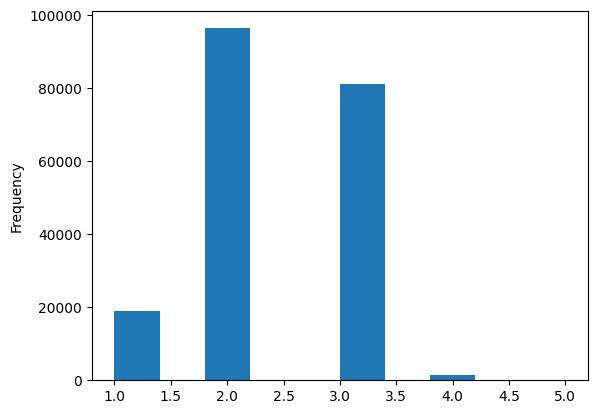

In [24]:
X_df['acuity'].plot(kind = 'hist')

In [25]:
X_df['acuity'] = X_df['acuity'].fillna(X_df['acuity'].median())

In [26]:
X_df.isna().sum()

stay_id              0
subject_id           0
hadm_id              0
gender               0
race                 0
ed_los_hours         0
acuity               0
is_admitted          0
disposition          0
medication_count     0
hosp_los_hours      26
dtype: int64

<Axes: ylabel='Frequency'>

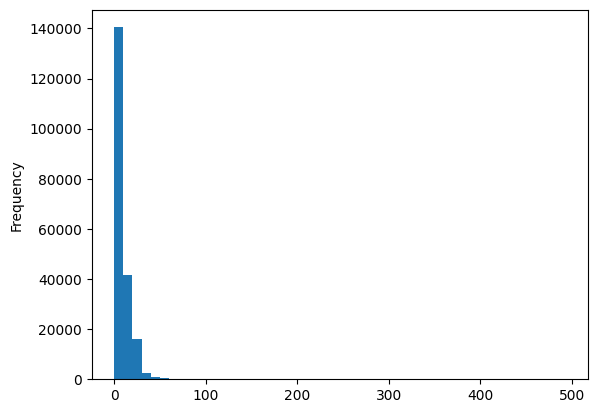

In [27]:
X_df['ed_los_hours'].plot(kind = 'hist', bins = 50)

<Axes: xlabel='ed_los_hours', ylabel='hosp_los_hours'>

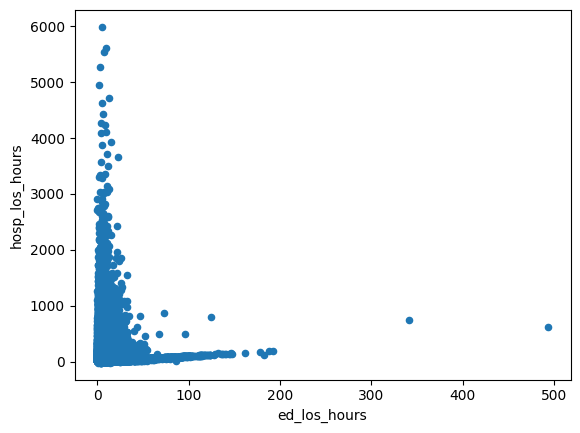

In [28]:
X_df[['ed_los_hours', 'hosp_los_hours']].plot(x = 'ed_los_hours', 
                                              y = 'hosp_los_hours',
                                              kind = 'scatter')

## Dealing with Race column

The race column is very granular, this will cause issues for our predictor

In [29]:
X_df['race'].unique()

array(['WHITE', 'ASIAN - SOUTH EAST ASIAN', 'BLACK/AFRICAN AMERICAN',
       'HISPANIC/LATINO - PUERTO RICAN', 'ASIAN - ASIAN INDIAN',
       'HISPANIC/LATINO - DOMINICAN', 'HISPANIC/LATINO - SALVADORAN',
       'ASIAN', 'HISPANIC/LATINO - MEXICAN', 'WHITE - OTHER EUROPEAN',
       'WHITE - EASTERN EUROPEAN', 'OTHER', 'UNKNOWN',
       'HISPANIC OR LATINO', 'HISPANIC/LATINO - HONDURAN',
       'HISPANIC/LATINO - GUATEMALAN', 'BLACK/AFRICAN', 'WHITE - RUSSIAN',
       'NATIVE HAWAIIAN OR OTHER PACIFIC ISLANDER', 'PORTUGUESE',
       'SOUTH AMERICAN', 'ASIAN - CHINESE', 'WHITE - BRAZILIAN',
       'HISPANIC/LATINO - CUBAN', 'UNABLE TO OBTAIN',
       'BLACK/CAPE VERDEAN', 'BLACK/CARIBBEAN ISLAND',
       'AMERICAN INDIAN/ALASKA NATIVE',
       'HISPANIC/LATINO - CENTRAL AMERICAN',
       'HISPANIC/LATINO - COLUMBIAN', 'PATIENT DECLINED TO ANSWER',
       'ASIAN - KOREAN', 'MULTIPLE RACE/ETHNICITY'], dtype=object)

Lets define 6 main categories: white, black, hispanic, asian, native/PI, and other

In [30]:
def simplify_race(r):
    r = str(r).upper()  # make sure comparison is case-insensitive
    if 'WHITE' in r:
        return 'WHITE'
    elif 'BLACK' in r or 'AFRICAN' in r:
        return 'BLACK'
    elif 'HISPANIC' in r or 'LATINO' in r:
        return 'HISPANIC'
    elif 'ASIAN' in r:
        return 'ASIAN'
    elif 'NATIVE' in r or 'PACIFIC' in r or 'ALASKA' in r:
        return 'NATIVE/PI'
    else:
        return 'OTHER'


In [31]:
X_df['race'] = X_df['race'].apply(simplify_race)

<Axes: xlabel='race'>

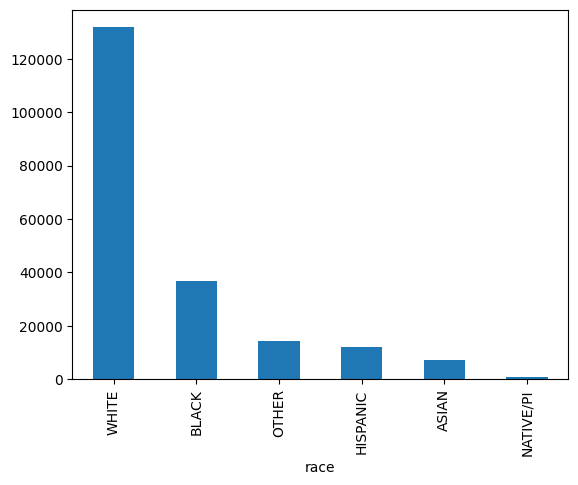

In [32]:
X_df['race'].value_counts().plot(kind = 'bar')

## Missing/Negative `hosp_los_hours`

In [33]:
X_df['hosp_los_hours'].describe()

count    202990.000000
mean        102.644086
std         152.808069
min         -22.650000
25%          21.683333
50%          61.883333
75%         121.400000
max        5990.050000
Name: hosp_los_hours, dtype: float64

<Axes: ylabel='Frequency'>

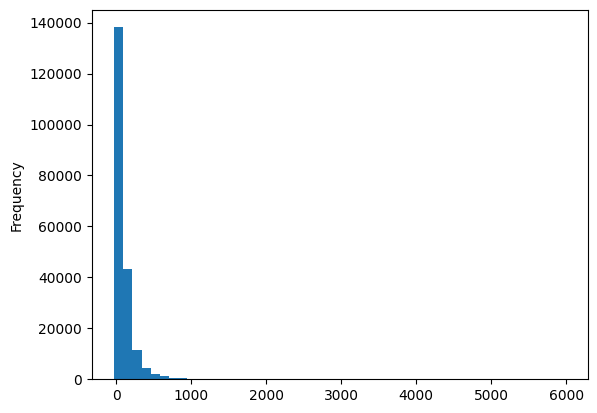

In [34]:
X_df['hosp_los_hours'].plot(kind = 'hist', bins = 50)

78 Rows have admitted los <= 0, and 

In [35]:
print('Num negative hours:' , (X_df['hosp_los_hours']< 0).sum())

print('Num na:', (X_df['hosp_los_hours'].isna().sum()))

Num negative hours: 78
Num na: 26


In [36]:
print((78+26)/X_df.shape[0])
print(X_df.shape[0])

0.000512274894589589
203016


**We'll just drop these rows since it makes up a small proportion of total number of rows in training data**)

In [37]:
X_df = X_df[X_df['hosp_los_hours'].notna()]

print(X_df.shape)

X_df = X_df[X_df['hosp_los_hours'] > 0]
print('shape after dropping')
print(X_df.shape)

(202990, 11)
shape after dropping
(202912, 11)


In [38]:
print('Num negative hours:' , (X_df['hosp_los_hours']< 0).sum())

print('Num na:', (X_df['hosp_los_hours'].isna().sum()))

Num negative hours: 0
Num na: 0


Since `hosp_los_hours` is right skewed, lets apply log

In [39]:
X_df['log_hosp_los_hours'] = np.log(X_df['hosp_los_hours'])

<Axes: ylabel='Frequency'>

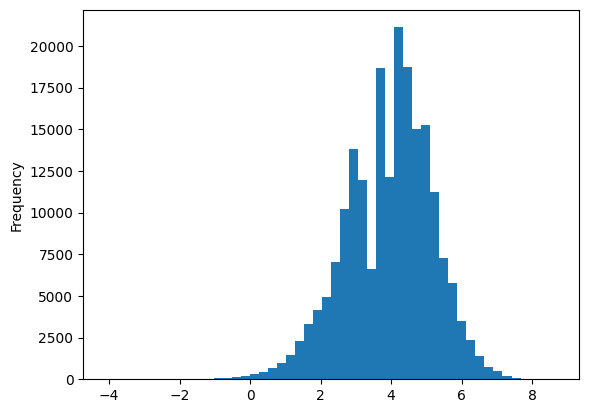

In [40]:
X_df['log_hosp_los_hours'].plot(kind = 'hist', bins = 50)

# Including ICD as Predictor

We will be using `triage_df` to pull icd information as predictor

In [47]:
triage_df.head()

,stay_id,subject_id,icd_code,icd_version,icd_title
0,30000012,11714491,5722,9,HEPATIC ENCEPHALOPATHY
1,30000012,11714491,5990,9,URIN TRACT INFECTION NOS
2,30000017,14230614,V08,9,ASYMPTOMATIC HIV INFECTION
3,30000017,14230614,4019,9,HYPERTENSION NOS
4,30000017,14230614,30300,9,AC ALCOHOL INTOX-UNSPEC


In [49]:
icd_df = triage_df[['stay_id', 'icd_code', 'icd_version', 'icd_title']]

One stay_id can have multiple icd_codes attached to it

In [51]:
icd_df.groupby('stay_id').count()

,icd_code,icd_version,icd_title
stay_id,,,
30000012,2,2,2
30000017,5,5,5
30000038,1,1,1
30000039,4,4,4
30000055,2,2,2
...,...,...,...
39999939,3,3,3
39999953,2,2,2
39999961,3,3,3


We confirm that each stay is recorded with one icd_version only

In [53]:
version_counts = (
    icd_df
    .groupby("stay_id")["icd_version"]
    .nunique()
)

(version_counts > 1).sum()

0

In [54]:
X_df = X_df.merge(icd_df, how = 'left', on = 'stay_id')

In [55]:
icd_missing_count = X_df[X_df['icd_code'].isna()].shape[0]

print('# Rows missing icd:', icd_missing_count)
print('Proportion of dataset:', icd_missing_count/len(X_df))

# Rows missing icd: 798
Proportion of dataset: 0.0018908563588930672


In [56]:
print(X_df.shape)
X_df = X_df[X_df['icd_code'].notna()]
X_df.shape


(422031, 15)


(421233, 15)

In [57]:
X_df.head()

,stay_id,subject_id,hadm_id,gender,race,ed_los_hours,acuity,is_admitted,disposition,medication_count,hosp_los_hours,log_hosp_los_hours,icd_code,icd_version,icd_title
0,30000012,11714491,21562392.0,F,WHITE,5.616667,2.0,True,ADMITTED,14.0,65.000000,4.174387,5722,9.0,HEPATIC ENCEPHALOPATHY
1,30000012,11714491,21562392.0,F,WHITE,5.616667,2.0,True,ADMITTED,14.0,65.000000,4.174387,5990,9.0,URIN TRACT INFECTION NOS
2,30000038,13821532,26255538.0,F,WHITE,3.300000,3.0,True,ADMITTED,12.0,45.616667,3.820273,J189,10.0,"PNEUMONIA, UNSPECIFIED ORGANISM"
3,30000039,13340997,23100190.0,M,WHITE,8.516667,3.0,True,ADMITTED,4.0,46.766667,3.845171,80709,9.0,FX MULT RIBS NOS-CLOSED
4,30000039,13340997,23100190.0,M,WHITE,8.516667,3.0,True,ADMITTED,4.0,46.766667,3.845171,8054,9.0,FX LUMBAR VERTEBRA-CLOSE


In [59]:
# X_df.to_csv('../../../MIMIC_ED/processed/los_training_df.csv', index=False)

# Probability aggregates for simmer

## Probability Distribution for Sex

In [178]:
p_sex = (
    ed_stays_df['gender']
    .value_counts(normalize=True)     
    .rename('probability')           
    .to_frame()                      
)

p_sex

,probability
gender,
F,0.54083
M,0.45917


## Probability Distribution for Disposition

In [177]:
p_disposition = (
    ed_stays_df['disposition']
    .value_counts(normalize=True)     # gives proportions
    .rename('probability')            # name the resulting column
    .to_frame()                       # convert Series → DataFrame
)
p_disposition

,probability
disposition,
HOME,0.568494
ADMITTED,0.371764
TRANSFER,0.016528
LEFT WITHOUT BEING SEEN,0.014479
ELOPED,0.013434
OTHER,0.009988
LEFT AGAINST MEDICAL ADVICE,0.004426
EXPIRED,0.000887


## Activity Transition Probabilities + Inter Activity Mean Times

In [9]:
# Ensure sorted by patient/stay and activity sequence
ed_activities = ed_activity_log.sort_values(['subject_id', 'stay_id', 'activity_seq'])

# Create a column for the next activity per stay
ed_activities['next_activity'] = ed_activities.groupby('stay_id')['activity'].shift(-1)


In [10]:
ed_activities[ed_activities['next_activity'] == 'Enter the ED']

,stay_id,subject_id,hadm_id,timestamps,activity,acuity,activity_seq,next_activity
3337465,38926302,10004235,24181354.0,2196-02-24 11:41:00,Medicine dispensations,NaN,1,Enter the ED
2311001,36185653,10012853,26369609.0,2175-04-05 06:05:00,Vital sign check,NaN,1,Enter the ED
3006334,38041922,10015129,28571111.0,2130-02-11 00:00:00,Vital sign check,NaN,1,Enter the ED
3493885,39346340,10022281,29642388.0,2125-06-16 20:31:00,Vital sign check,NaN,1,Enter the ED
3329605,38904496,10026754,NaN,2137-03-18 00:00:00,Vital sign check,NaN,1,Enter the ED
...,...,...,...,...,...,...,...,...
1466625,33927080,19935090,29758053.0,2116-07-14 03:55:00,Medicine dispensations,NaN,2,Enter the ED
1010598,32707171,19959042,22613316.0,2139-10-22 13:51:00,Medicine dispensations,NaN,1,Enter the ED
1695282,34539013,19960879,29288546.0,2169-05-08 11:54:00,Vital sign check,NaN,1,Enter the ED
2552573,36832103,19973404,23868350.0,2166-01-01 06:02:00,Medicine dispensations,NaN,2,Enter the ED


In [14]:
# Drop rows where next_activity is NaN (i.e., last activity in stay)
transitions = ed_activities.dropna(subset=['next_activity'])

# Count how many times each transition occurs
transition_counts = transitions.groupby(['activity', 'next_activity']).size().unstack(fill_value=0)
# Divide each row by its sum to get probabilities

activity_order = ['Enter the ED', 'Triage in the ED', 'Medicine reconciliation', 'Medicine dispensations', 'Vital sign check',]
next_activity_order = ['Enter the ED', 'Triage in the ED', 'Medicine reconciliation', 'Medicine dispensations', 'Vital sign check', 'Discharge from the ED']

transition_matrix = transition_counts.div(transition_counts.sum(axis=1), axis=0)
transition_matrix = transition_matrix.loc[activity_order, next_activity_order]

In [179]:
transition_matrix

next_activity,Enter the ED,Triage in the ED,Medicine reconciliation,Medicine dispensations,Vital sign check,Discharge from the ED
activity,,,,,,
Enter the ED,0.000000,0.815297,0.000000,0.000252,0.184451,0.000000
Triage in the ED,0.000000,0.000000,0.301775,0.163615,0.507623,0.026986
Medicine reconciliation,0.000009,0.000000,0.042222,0.356961,0.545015,0.055793
Medicine dispensations,0.000326,0.000118,0.065990,0.264208,0.580144,0.089215
Vital sign check,0.000721,0.055848,0.098206,0.249485,0.360656,0.235083


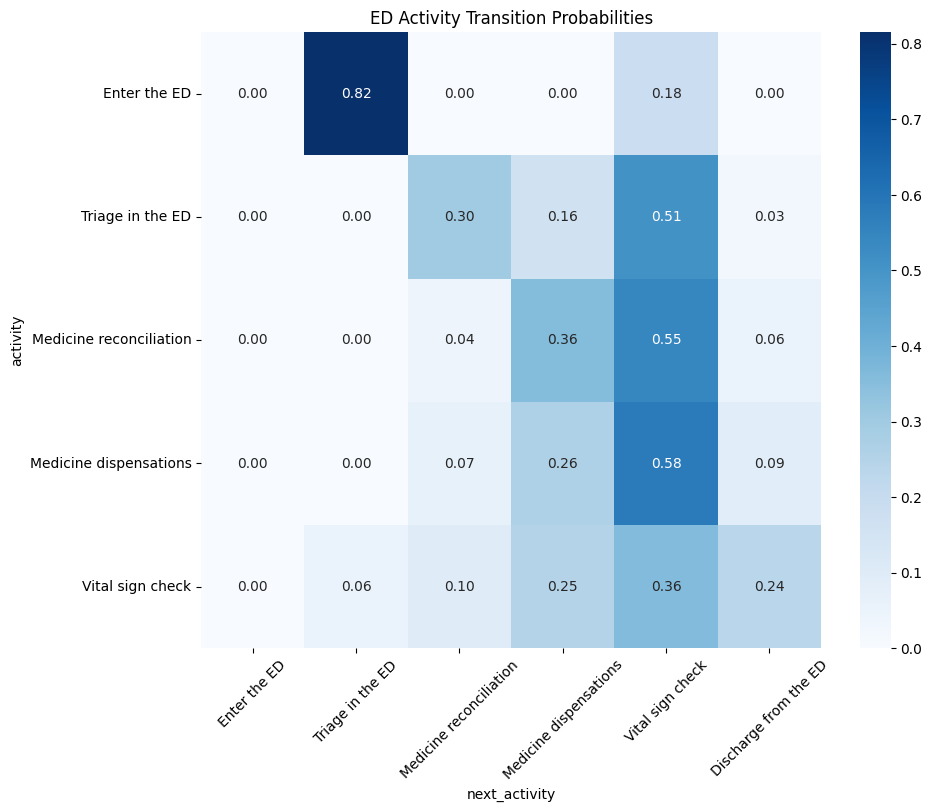

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
sns.heatmap(transition_matrix, annot=True, fmt=".2f", cmap="Blues")
plt.title("ED Activity Transition Probabilities")
plt.xticks(rotation = 45)
plt.show()


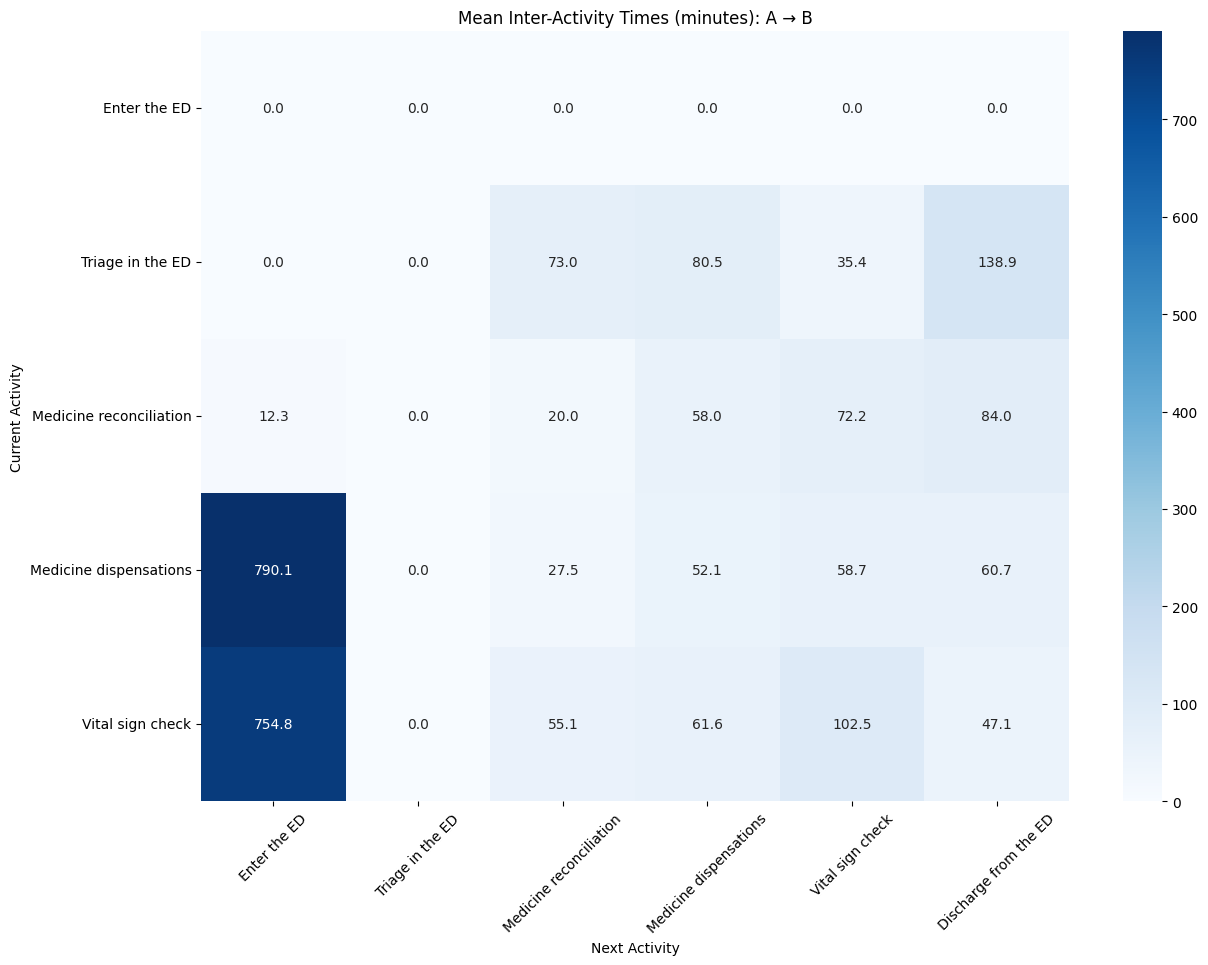

In [30]:
# Ensure timestamps are datetime
ed_activities['timestamps'] = pd.to_datetime(ed_activities['timestamps'])

# Create next_timestamp per stay
ed_activities['next_timestamp'] = (
    ed_activities
    .groupby('stay_id')['timestamps']
    .shift(-1)
)

# Compute inter-activity time
ed_activities['inter_time'] = (
    ed_activities['next_timestamp'] - ed_activities['timestamps']
)

# Mean time between activity → next_activity
mean_inter_times = (
    ed_activities
    .groupby(['activity', 'next_activity'])['inter_time']
    .mean()
    .dropna()
)

# Convert to minutes
mean_inter_times_minutes = mean_inter_times.dt.total_seconds() / 60


activity_order = ['Enter the ED', 'Triage in the ED', 'Medicine reconciliation', 'Medicine dispensations', 'Vital sign check',]
next_activity_order = ['Enter the ED', 'Triage in the ED', 'Medicine reconciliation', 'Medicine dispensations', 'Vital sign check', 'Discharge from the ED']


# Make matrix for heatmap
mean_inter_matrix = mean_inter_times_minutes.unstack(fill_value=0)
mean_inter_matrix = mean_inter_matrix.loc[activity_order, next_activity_order]

# Plot heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(mean_inter_matrix, cmap='Blues', annot=True, fmt=".1f")
plt.title("Mean Inter-Activity Times (minutes): A → B")
plt.xlabel("Next Activity")
plt.ylabel("Current Activity")
plt.xticks(rotation = 45)

plt.show()


In [33]:
mean_inter_matrix

next_activity,Enter the ED,Triage in the ED,Medicine reconciliation,Medicine dispensations,Vital sign check,Discharge from the ED
activity,,,,,,
Enter the ED,0.000000,0.016667,0.000000,0.000000,0.000000,0.000000
Triage in the ED,0.000000,0.000000,73.012710,80.488187,35.426041,138.866097
Medicine reconciliation,12.333333,0.000000,20.000072,57.976733,72.168554,84.014439
Medicine dispensations,790.092437,0.016667,27.537236,52.129917,58.709472,60.674971
Vital sign check,754.843040,0.016667,55.110634,61.603814,102.512005,47.124184


In [34]:
transition_matrix


next_activity,Enter the ED,Triage in the ED,Medicine reconciliation,Medicine dispensations,Vital sign check,Discharge from the ED
activity,,,,,,
Enter the ED,0.000000,0.815297,0.000000,0.000252,0.184451,0.000000
Triage in the ED,0.000000,0.000000,0.301775,0.163615,0.507623,0.026986
Medicine reconciliation,0.000009,0.000000,0.042222,0.356961,0.545015,0.055793
Medicine dispensations,0.000326,0.000118,0.065990,0.264208,0.580144,0.089215
Vital sign check,0.000721,0.055848,0.098206,0.249485,0.360656,0.235083
